# Analyse the data with outlier removed using different tecniques

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
data_out_rem=pd.read_csv('out_rem.csv',index_col=False)

In [3]:
data_out_rem.head()

,Unnamed: 0,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,...,Week_48,Week_49,Week_50,Week_51,Week_52,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1643690.90,42.31,2.572,211.096358,8.106
1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1641957.44,38.51,2.548,211.242170,8.106
2,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1611968.17,39.93,2.514,211.289143,8.106
3,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1409727.59,46.63,2.561,211.319643,8.106
4,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1554806.68,46.50,2.625,211.350143,8.106


In [4]:
x=data_out_rem.copy(deep=True)
x.drop('Weekly_Sales',axis=1,inplace=True)
x.drop('Unnamed: 0',axis=1,inplace=True)
x.head()

,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,Store_10,...,Week_47,Week_48,Week_49,Week_50,Week_51,Week_52,Temperature,Fuel_Price,CPI,Unemployment
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,42.31,2.572,211.096358,8.106
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,38.51,2.548,211.242170,8.106
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,39.93,2.514,211.289143,8.106
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,46.63,2.561,211.319643,8.106
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,46.50,2.625,211.350143,8.106


In [5]:
y=data_out_rem['Weekly_Sales']
y.head()

0    1643690.90
1    1641957.44
2    1611968.17
3    1409727.59
4    1554806.68
Name: Weekly_Sales, dtype: float64

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
x_train.reset_index(inplace=True,drop=True)
y_train.reset_index(inplace=True,drop=True)

In [7]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [8]:
sc=StandardScaler()
x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.transform(x_test)
x_train_sc=pd.DataFrame(columns=x_train.columns,data=x_train_sc)
x_train_sc

,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,Store_10,...,Week_47,Week_48,Week_49,Week_50,Week_51,Week_52,Temperature,Fuel_Price,CPI,Unemployment
0,-0.156644,-0.160817,-0.159437,-0.139608,-0.158046,-0.162867,-0.152367,-0.160128,-0.162186,-0.155938,...,-0.118577,-0.112987,-0.121281,-0.1248,-0.119485,-0.122169,0.920794,0.535558,-1.147694,-1.585645
1,-0.156644,-0.160817,-0.159437,-0.139608,-0.158046,-0.162867,-0.152367,-0.160128,-0.162186,-0.155938,...,-0.118577,-0.112987,-0.121281,-0.1248,-0.119485,-0.122169,0.400955,1.408019,-0.961321,0.352140
2,-0.156644,-0.160817,6.272080,-0.139608,-0.158046,-0.162867,-0.152367,-0.160128,-0.162186,-0.155938,...,-0.118577,-0.112987,-0.121281,-0.1248,-0.119485,-0.122169,0.412350,-1.248922,0.981385,-0.303538
3,-0.156644,-0.160817,-0.159437,-0.139608,-0.158046,-0.162867,-0.152367,-0.160128,-0.162186,-0.155938,...,-0.118577,-0.112987,-0.121281,-0.1248,-0.119485,-0.122169,1.177457,-1.662078,0.888619,0.522762
4,-0.156644,-0.160817,-0.159437,-0.139608,-0.158046,-0.162867,-0.152367,-0.160128,-0.162186,-0.155938,...,-0.118577,-0.112987,-0.121281,-0.1248,-0.119485,-0.122169,-1.110266,0.915749,-1.138597,-1.779017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4755,-0.156644,-0.160817,-0.159437,-0.139608,-0.158046,-0.162867,-0.152367,-0.160128,-0.162186,-0.155938,...,-0.118577,-0.112987,-0.121281,-0.1248,8.369276,-0.122169,-0.270819,-0.497331,1.087542,-0.000480
4756,-0.156644,-0.160817,-0.159437,-0.139608,-0.158046,-0.162867,-0.152367,-0.160128,-0.162186,-0.155938,...,-0.118577,-0.112987,-0.121281,-0.1248,-0.119485,-0.122169,0.638627,-1.165412,0.741897,0.113268
4757,-0.156644,-0.160817,-0.159437,-0.139608,-0.158046,-0.162867,-0.152367,-0.160128,-0.162186,-0.155938,...,-0.118577,-0.112987,-0.121281,-0.1248,-0.119485,-0.122169,1.146527,0.509186,-1.187544,-0.682158
4758,-0.156644,-0.160817,-0.159437,-0.139608,-0.158046,-0.162867,-0.152367,-0.160128,-0.162186,-0.155938,...,-0.118577,-0.112987,-0.121281,-0.1248,-0.119485,-0.122169,-0.482987,-1.262108,0.751750,-0.188977


**Handling Multincollinearity - 1. Statsmodels.api**

In [9]:
import statsmodels.api as sm
x_train_mod=sm.add_constant(x_train_sc)
x_train_mod

,const,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,...,Week_47,Week_48,Week_49,Week_50,Week_51,Week_52,Temperature,Fuel_Price,CPI,Unemployment
0,1.0,-0.156644,-0.160817,-0.159437,-0.139608,-0.158046,-0.162867,-0.152367,-0.160128,-0.162186,...,-0.118577,-0.112987,-0.121281,-0.1248,-0.119485,-0.122169,0.920794,0.535558,-1.147694,-1.585645
1,1.0,-0.156644,-0.160817,-0.159437,-0.139608,-0.158046,-0.162867,-0.152367,-0.160128,-0.162186,...,-0.118577,-0.112987,-0.121281,-0.1248,-0.119485,-0.122169,0.400955,1.408019,-0.961321,0.352140
2,1.0,-0.156644,-0.160817,6.272080,-0.139608,-0.158046,-0.162867,-0.152367,-0.160128,-0.162186,...,-0.118577,-0.112987,-0.121281,-0.1248,-0.119485,-0.122169,0.412350,-1.248922,0.981385,-0.303538
3,1.0,-0.156644,-0.160817,-0.159437,-0.139608,-0.158046,-0.162867,-0.152367,-0.160128,-0.162186,...,-0.118577,-0.112987,-0.121281,-0.1248,-0.119485,-0.122169,1.177457,-1.662078,0.888619,0.522762
4,1.0,-0.156644,-0.160817,-0.159437,-0.139608,-0.158046,-0.162867,-0.152367,-0.160128,-0.162186,...,-0.118577,-0.112987,-0.121281,-0.1248,-0.119485,-0.122169,-1.110266,0.915749,-1.138597,-1.779017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4755,1.0,-0.156644,-0.160817,-0.159437,-0.139608,-0.158046,-0.162867,-0.152367,-0.160128,-0.162186,...,-0.118577,-0.112987,-0.121281,-0.1248,8.369276,-0.122169,-0.270819,-0.497331,1.087542,-0.000480
4756,1.0,-0.156644,-0.160817,-0.159437,-0.139608,-0.158046,-0.162867,-0.152367,-0.160128,-0.162186,...,-0.118577,-0.112987,-0.121281,-0.1248,-0.119485,-0.122169,0.638627,-1.165412,0.741897,0.113268
4757,1.0,-0.156644,-0.160817,-0.159437,-0.139608,-0.158046,-0.162867,-0.152367,-0.160128,-0.162186,...,-0.118577,-0.112987,-0.121281,-0.1248,-0.119485,-0.122169,1.146527,0.509186,-1.187544,-0.682158
4758,1.0,-0.156644,-0.160817,-0.159437,-0.139608,-0.158046,-0.162867,-0.152367,-0.160128,-0.162186,...,-0.118577,-0.112987,-0.121281,-0.1248,-0.119485,-0.122169,-0.482987,-1.262108,0.751750,-0.188977


In [10]:
model=sm.OLS(y_train,x_train_mod).fit()

In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     1242.
Date:                Mon, 28 Nov 2022   Prob (F-statistic):               0.00
Time:                        12:57:22   Log-Likelihood:                -61930.
No. Observations:                4760   AIC:                         1.241e+05
Df Residuals:                    4658   BIC:                         1.247e+05
Df Model:                         101                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.048e+06   1585.056    661.272      0.000    1.05e+06    1.05e+06
Store_1         5.352e+04   8770.841      6.102      0.000    3.63e+04    7.07e+04
Store_2          1.11e+05   8910.472     12.453      0.000    9.35e+04    1.28e+05
Store_3        -1.307e+05   9660.288    -13.526      0.000    -1.5e+05   -1.12e+05
Store_4          1.55e+05   9073.805     17.078      0.000    1.37e+05    1.73e+05
Store_5         -1.46e+05   9050.039    -16.128      0.000   -1.64e+05   -1.28e+05
Store_6         4.877e+04   9498.106      5.135      0.000    3.01e+04    6.74e+04
Store_7        -7.199e+04   4210.711    -17.097      0.000   -8.02e+04   -6.37e+04
Store_8        -5.784e+04   9785.652     -5.910      0.000    -7.7e+04   -3.87e+04
Store_9        -1.162e+05   9961.371    -11.661      0.000   -1.36e+05   -9.66e+04
Store_10         1.56e+05   1.01e+04     15.419      0.000    1.36e+05    1.76e+05
Store_11        1.716e+04   9516.561      1.803      0.071   -1499.883    3.58e+04
Store_12        1.373e+04   4066.506      3.376      0.001    5754.564    2.17e+04
Store_13         1.73e+05   1.04e+04     16.677      0.000    1.53e+05    1.93e+05
Store_14        1.494e+05   2814.136     53.085      0.000    1.44e+05    1.55e+05
Store_15       -3.977e+04   8755.676     -4.542      0.000   -5.69e+04   -2.26e+04
Store_16       -9.827e+04   4381.652    -22.427      0.000   -1.07e+05   -8.97e+04
Store_17       -2897.2011   1.01e+04     -0.286      0.775   -2.28e+04     1.7e+04
Store_18        3.605e+04   8863.563      4.067      0.000    1.87e+04    5.34e+04
Store_19        8.936e+04   9052.540      9.871      0.000    7.16e+04    1.07e+05
Store_20         1.39e+05   7221.659     19.248      0.000    1.25e+05    1.53e+05
Store_21       -6.825e+04   8597.390     -7.938      0.000   -8.51e+04   -5.14e+04
Store_22         2.02e+04   7733.182      2.612      0.009    5035.087    3.54e+04
Store_23        4.837e+04   7208.247      6.710      0.000    3.42e+04    6.25e+04
Store_24        7.382e+04   8624.678      8.559      0.000    5.69e+04    9.07e+04
Store_25       -7.245e+04   7411.057     -9.776      0.000    -8.7e+04   -5.79e+04
Store_26        2.019e+04   8812.995      2.291      0.022    2913.184    3.75e+04
Store_27        1.338e+05   7944.261     16.847      0.000    1.18e+05    1.49e+05
Store_28        2.972e+04   4191.450      7.092      0.000    2.15e+04    3.79e+04
Store_29       -3.995e+04   8779.173     -4.550      0.000   -5.72e+04   -2.27e+04
Store_30        -1.16e+05   8662.924    -13.387      0.000   -1.33e+05    -9.9e+04
Store_31        2.837e+04   8558.441      3.315      0.001    1.16e+04    4.52e+04
Store_32        1.632e+04   4246.465      3.844      0.000    7997.890    2.46e+04
Store_33       -9.238e+04   1.02e+04     -9.068      0.000   -1.12e+05   -7.24e+04
Store_34    

In [12]:
l=[]
model_data=pd.DataFrame()
for i in range(len(x_train_mod.columns)):
    l.append(model.pvalues[i])
model_data['Feature']=x_train_mod.columns
model_data['p values']=l
model_data.sort_values(by='p values',inplace=True,ascending=False)
model_data.reset_index(inplace=True,drop=True)
model_data

,Feature,p values
0,Week_10,9.373453e-01
1,Week_13,8.880617e-01
2,Store_17,7.752735e-01
3,Week_18,6.674634e-01
4,Week_24,6.378457e-01
...,...,...
102,Week_50,8.474387e-114
103,Week_47,2.205717e-196
104,Store_14,0.000000e+00
105,Week_51,0.000000e+00


In [13]:
drop_list=[]
for j in range(len(model_data)):
    if model_data['p values'][0]>0.05:
        x_train_mod.drop(model_data['Feature'][0],inplace=True,axis=1)
        drop_list.append(model_data['Feature'][0])
        l=[]
        model_data=pd.DataFrame()
        model=sm.OLS(y_train,x_train_mod).fit()
        for i in range(len(x_train_mod.columns)):
            l.append(model.pvalues[i])
        model_data['Feature']=x_train_mod.columns
        model_data['p values']=l
        model_data.sort_values(by='p values',inplace=True,ascending=False)
        model_data.reset_index(inplace=True,drop=True)
    else:
        break
model_data

,Feature,p values
0,Week_35,0.041195
1,Week_6,0.028492
2,Store_40,0.026515
3,Week_20,0.011654
4,Fuel_Price,0.010973
...,...,...
78,Store_21,0.000000
79,Store_25,0.000000
80,Store_27,0.000000
81,Store_30,0.000000


In [14]:
drop_list

['Week_10',
 'Week_13',
 'Store_17',
 'Week_26',
 'Week_21',
 'Week_1',
 'Week_16',
 'Week_46',
 'Week_31',
 'Week_11',
 'Week_34',
 'Week_25',
 'Week_33',
 'Week_8',
 'Store_11',
 'Week_44',
 'Week_45',
 'Week_18',
 'Week_24',
 'Week_15',
 'Week_19',
 'Week_40',
 'Week_32',
 'Store_32']

In [15]:
x_train_sc.drop(columns=drop_list,axis=1,inplace=True)

In [16]:
x_train_sc

,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,Store_10,...,Week_47,Week_48,Week_49,Week_50,Week_51,Week_52,Temperature,Fuel_Price,CPI,Unemployment
0,-0.156644,-0.160817,-0.159437,-0.139608,-0.158046,-0.162867,-0.152367,-0.160128,-0.162186,-0.155938,...,-0.118577,-0.112987,-0.121281,-0.1248,-0.119485,-0.122169,0.920794,0.535558,-1.147694,-1.585645
1,-0.156644,-0.160817,-0.159437,-0.139608,-0.158046,-0.162867,-0.152367,-0.160128,-0.162186,-0.155938,...,-0.118577,-0.112987,-0.121281,-0.1248,-0.119485,-0.122169,0.400955,1.408019,-0.961321,0.352140
2,-0.156644,-0.160817,6.272080,-0.139608,-0.158046,-0.162867,-0.152367,-0.160128,-0.162186,-0.155938,...,-0.118577,-0.112987,-0.121281,-0.1248,-0.119485,-0.122169,0.412350,-1.248922,0.981385,-0.303538
3,-0.156644,-0.160817,-0.159437,-0.139608,-0.158046,-0.162867,-0.152367,-0.160128,-0.162186,-0.155938,...,-0.118577,-0.112987,-0.121281,-0.1248,-0.119485,-0.122169,1.177457,-1.662078,0.888619,0.522762
4,-0.156644,-0.160817,-0.159437,-0.139608,-0.158046,-0.162867,-0.152367,-0.160128,-0.162186,-0.155938,...,-0.118577,-0.112987,-0.121281,-0.1248,-0.119485,-0.122169,-1.110266,0.915749,-1.138597,-1.779017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4755,-0.156644,-0.160817,-0.159437,-0.139608,-0.158046,-0.162867,-0.152367,-0.160128,-0.162186,-0.155938,...,-0.118577,-0.112987,-0.121281,-0.1248,8.369276,-0.122169,-0.270819,-0.497331,1.087542,-0.000480
4756,-0.156644,-0.160817,-0.159437,-0.139608,-0.158046,-0.162867,-0.152367,-0.160128,-0.162186,-0.155938,...,-0.118577,-0.112987,-0.121281,-0.1248,-0.119485,-0.122169,0.638627,-1.165412,0.741897,0.113268
4757,-0.156644,-0.160817,-0.159437,-0.139608,-0.158046,-0.162867,-0.152367,-0.160128,-0.162186,-0.155938,...,-0.118577,-0.112987,-0.121281,-0.1248,-0.119485,-0.122169,1.146527,0.509186,-1.187544,-0.682158
4758,-0.156644,-0.160817,-0.159437,-0.139608,-0.158046,-0.162867,-0.152367,-0.160128,-0.162186,-0.155938,...,-0.118577,-0.112987,-0.121281,-0.1248,-0.119485,-0.122169,-0.482987,-1.262108,0.751750,-0.188977


In [17]:
x_test_sc=pd.DataFrame(columns=x_test.columns,data=x_test_sc)
x_test_sc

,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,Store_10,...,Week_47,Week_48,Week_49,Week_50,Week_51,Week_52,Temperature,Fuel_Price,CPI,Unemployment
0,6.383916,-0.160817,-0.159437,-0.139608,-0.158046,-0.162867,-0.152367,-0.160128,-0.162186,-0.155938,...,-0.118577,-0.112987,-0.121281,-0.1248,-0.119485,-0.122169,1.090094,0.658625,1.196498,-0.656971
1,-0.156644,-0.160817,-0.159437,-0.139608,-0.158046,-0.162867,-0.152367,-0.160128,-0.162186,6.412791,...,-0.118577,8.850612,-0.121281,-0.1248,-0.119485,-0.122169,-0.168805,0.797076,-1.173122,0.127893
2,-0.156644,-0.160817,-0.159437,-0.139608,6.327281,-0.162867,-0.152367,-0.160128,-0.162186,-0.155938,...,-0.118577,-0.112987,-0.121281,-0.1248,-0.119485,-0.122169,-1.123289,-1.684054,0.923513,-0.934842
3,-0.156644,-0.160817,-0.159437,-0.139608,-0.158046,-0.162867,-0.152367,-0.160128,-0.162186,-0.155938,...,-0.118577,-0.112987,-0.121281,-0.1248,-0.119485,-0.122169,-0.746162,0.871796,0.438393,0.713697
4,-0.156644,-0.160817,-0.159437,-0.139608,-0.158046,-0.162867,-0.152367,-0.160128,-0.162186,-0.155938,...,-0.118577,-0.112987,-0.121281,-0.1248,-0.119485,-0.122169,-1.955682,-1.209365,-1.031998,0.460201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1186,-0.156644,-0.160817,-0.159437,-0.139608,-0.158046,-0.162867,-0.152367,-0.160128,-0.162186,-0.155938,...,-0.118577,-0.112987,-0.121281,-0.1248,-0.119485,-0.122169,1.344044,0.860808,1.290313,-1.123339
1187,-0.156644,-0.160817,-0.159437,-0.139608,-0.158046,-0.162867,-0.152367,-0.160128,-0.162186,-0.155938,...,-0.118577,-0.112987,-0.121281,-0.1248,-0.119485,-0.122169,0.548008,0.368537,1.216305,-1.256587
1188,-0.156644,-0.160817,-0.159437,-0.139608,-0.158046,-0.162867,-0.152367,-0.160128,-0.162186,-0.155938,...,-0.118577,-0.112987,-0.121281,-0.1248,-0.119485,-0.122169,1.160093,0.016916,1.174346,-0.670783
1189,-0.156644,-0.160817,-0.159437,-0.139608,-0.158046,-0.162867,-0.152367,-0.160128,-0.162186,-0.155938,...,-0.118577,-0.112987,-0.121281,-0.1248,-0.119485,-0.122169,0.395529,1.010247,0.997733,-0.469286


In [18]:
x_test_sc.drop(columns=drop_list,inplace=True)


**LINEAR REGRESSION SCORES ON THE REDUCED DATA**

In [19]:
def model_score(mod,x_train,y_train,x_test,y_test):
    model=mod()
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print('MODEL: ',mod)
    print('/nR2 Score: ',r2_score(y_test,y_pred))
    print('RMSE: ',np.sqrt(mean_squared_error(y_test,y_pred)))
    

In [55]:
print('Scores of testing data')
model_score(LinearRegression,x_train_sc,y_train,x_test_sc,y_test)
x_train_mod=sm.add_constant(x_train_sc)
re=sm.OLS(y_train,x_train_mod).fit()
re.summary()

Scores of testing data
MODEL:  <class 'sklearn.linear_model._base.LinearRegression'>
/nR2 Score:  0.9589345850661863
RMSE:  116397.60061330981


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     1584.
Date:                Mon, 28 Nov 2022   Prob (F-statistic):               0.00
Time:                        13:09:29   Log-Likelihood:                -61946.
No. Observations:                4760   AIC:                         1.241e+05
Df Residuals:                    4680   BIC:                         1.246e+05
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.048e+06   1586.555    660.647      0.000    1.05e+06    1.05e+06
Store_1         3.542e+04   1994.561     17.760      0.000    3.15e+04    3.93e+04
Store_2         9.251e+04   2010.320     46.019      0.000    8.86e+04    9.65e+04
Store_3        -1.495e+05   2083.547    -71.733      0.000   -1.54e+05   -1.45e+05
Store_4         1.577e+05   2142.179     73.619      0.000    1.54e+05    1.62e+05
Store_5        -1.634e+05   2207.543    -74.008      0.000   -1.68e+05   -1.59e+05
Store_6         3.037e+04   2178.051     13.943      0.000    2.61e+04    3.46e+04
Store_7        -8.627e+04   1966.909    -43.861      0.000   -9.01e+04   -8.24e+04
Store_8        -7.644e+04   2328.036    -32.836      0.000    -8.1e+04   -7.19e+04
Store_9        -1.348e+05   2335.719    -57.732      0.000   -1.39e+05    -1.3e+05
Store_10        1.581e+05   2507.795     63.031      0.000    1.53e+05    1.63e+05
Store_12        1.389e+04   1963.354      7.073      0.000       1e+04    1.77e+04
Store_13        1.753e+05   2227.806     78.667      0.000    1.71e+05     1.8e+05
Store_14        1.372e+05   1937.993     70.797      0.000    1.33e+05    1.41e+05
Store_15       -3.976e+04   2230.329    -17.827      0.000   -4.41e+04   -3.54e+04
Store_16       -1.115e+05   2029.387    -54.951      0.000   -1.15e+05   -1.08e+05
Store_18        3.565e+04   2414.858     14.761      0.000    3.09e+04    4.04e+04
Store_19        8.936e+04   2278.707     39.215      0.000    8.49e+04    9.38e+04
Store_20        1.224e+05   1982.156     61.731      0.000    1.18e+05    1.26e+05
Store_21       -8.609e+04   1982.353    -43.429      0.000      -9e+04   -8.22e+04
Store_22        1.935e+04   2150.736      8.995      0.000    1.51e+04    2.36e+04
Store_23        4.984e+04   2201.139     22.641      0.000    4.55e+04    5.42e+04
Store_24        7.362e+04   2306.712     31.914      0.000    6.91e+04    7.81e+04
Store_25       -8.962e+04   2010.179    -44.584      0.000   -9.36e+04   -8.57e+04
Store_26        1.999e+04   2186.657      9.143      0.000    1.57e+04    2.43e+04
Store_27        1.331e+05   2198.232     60.559      0.000    1.29e+05    1.37e+05
Store_28        2.985e+04   1978.581     15.087      0.000     2.6e+04    3.37e+04
Store_29       -4.091e+04   2698.573    -15.160      0.000   -4.62e+04   -3.56e+04
Store_30        -1.34e+05   1988.977    -67.347      0.000   -1.38e+05    -1.3e+05
Store_31        1.069e+04   1979.072      5.400      0.000    6807.517    1.46e+04
Store_33       -9.021e+04   2578.793    -34.982      0.000   -9.53e+04   -8.52e+04
Store_34        3.028e+04   2892.616     10.468      0.000    2.46e+04     3.6e+04
Store_35        7925.6874   2323.335      3.411      0.001    3370.856    1.25e+04
Store_36       -1.511e+05   2018.794    -74.862      0.000   -1.55e+05   -1.47e+05
Store_37    

In [21]:
print('Scores of training data')
model_score(LinearRegression,x_train_sc,y_train,x_train_sc,y_train)

Scores of training data
MODEL:  <class 'sklearn.linear_model._base.LinearRegression'>
/nR2 Score:  0.9639382909949186
RMSE:  108559.66738090149


**Handling Multincollinearity - 2. VIF**

In [22]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x,y,test_size=0.2,random_state=0)

In [23]:
sc1=StandardScaler()
x_train1_sc=sc1.fit_transform(x_train1)
x_test1_sc=sc1.transform(x_test1)

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=pd.DataFrame()
vif_data['Features']=x_train1.columns
vif_data['Variance Inflation']=[variance_inflation_factor(x_train1_sc, i) for i in range(len(x_train1.columns))]
vif_data.sort_values(by='Variance Inflation',inplace=True)
vif_data.reset_index(inplace=True,drop=True)
vif_data

C:\Users\WIN\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,Variance Inflation
0,Fuel_Price,11.242389
1,Unemployment,12.039647
2,Temperature,16.288615
3,CPI,1142.111391
4,Week_14,1507.587730
...,...,...
101,Store_22,inf
102,Store_40,inf
103,Store_21,inf
104,Store_31,inf


In [25]:
cols=[]
for i in range(len(vif_data['Features'])):
    if vif_data.iloc[i,1]!=np.inf:
        cols.append(vif_data['Features'][i])
x_train_new=sc.fit_transform(x_train1[cols])
vif_data=pd.DataFrame()
vif_data['Features']=x_train1[cols].columns
vif_data['Variance Inflation']=[variance_inflation_factor(x_train_new, i) for i in range(len(x_train1[cols].columns))]
vif_data.sort_values(by='Variance Inflation',inplace=True)
vif_data.reset_index(drop=True,inplace=True)
vif_data

C:\Users\WIN\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,Variance Inflation
0,Unemployment,1.175196
1,CPI,1.586661
2,Temperature,3.552606
3,Fuel_Price,7.404788
4,Week_15,inf
...,...,...
56,Week_16,inf
57,Week_37,inf
58,Week_45,inf
59,Week_25,inf


In [26]:
cols=[]
for i in range(len(vif_data['Features'])):
    if vif_data.iloc[i,1]!=np.inf:
        cols.append(vif_data['Features'][i])
x_train_new=sc.fit_transform(x_train1[cols])
vif_data=pd.DataFrame()
vif_data['Features']=x_train1[cols].columns
vif_data['Variance Inflation']=[variance_inflation_factor(x_train_new, i) for i in range(len(x_train1[cols].columns))]
vif_data.sort_values(by='Variance Inflation',inplace=True)
vif_data.reset_index(drop=True,inplace=True)
vif_data


,Features,Variance Inflation
0,Fuel_Price,1.078226
1,Unemployment,1.084436
2,Temperature,1.096695
3,CPI,1.159851


**VIF doesnt seem to be a good method as lot of data is lost in the process**

**Feature Selection- RFE - with original**

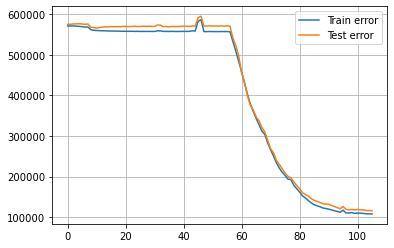

In [27]:
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
x_train2,x_test2,y_train2,y_test2=train_test_split(x,y,test_size=0.2,random_state=0)
sc2=StandardScaler()
x_train2_sc=sc2.fit_transform(x_train2)
x_test2_sc=sc2.transform(x_test2)
x_train2_sc=pd.DataFrame(columns=x_train2.columns,data=x_train2_sc)
x_test2_sc=pd.DataFrame(columns=x_test2.columns,data=x_test2_sc)
train_error=[]
test_error=[]
for i in range (1,x_train2.shape[1]+1):
    lr=LinearRegression()
    rfe=RFE(lr,n_features_to_select=i)
    rfe=rfe.fit(x_train2_sc,y_train2)
    lr.fit(x_train2_sc.loc[:,rfe.support_],y_train2)
    y_pred_train=lr.predict(x_train2_sc.loc[:,rfe.support_])
    y_pred_test=lr.predict(x_test2_sc.loc[:,rfe.support_])
    train_error.append(np.sqrt(mean_squared_error(y_train2,y_pred_train)))
    test_error.append(np.sqrt(mean_squared_error(y_test2,y_pred_test)))
plt.plot(train_error,label='Train error')
plt.plot(test_error,label='Test error')
plt.legend()
plt.grid()

In [28]:
error=pd.DataFrame()
error['index']=range(1,x_train2.shape[1]+1)
error['train_error']=train_error
error['test_error']=test_error
error[90:100]

,index,train_error,test_error
90,91,120016.460809,132257.784120
91,92,118046.601819,129179.423194
92,93,116153.340149,126398.051735
93,94,114449.829365,123711.069301
94,95,112084.401767,120912.681288
95,96,117510.885949,126421.823517
96,97,110628.972395,119435.530407
97,98,110415.420384,118296.132622
98,99,111494.192214,119046.671613
99,100,109508.662692,118195.957710


**Feature Selection- RFE - with reduced time series**

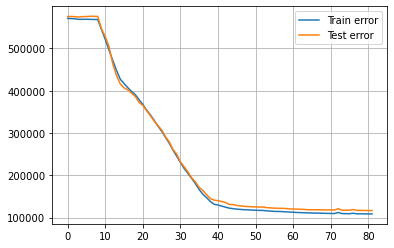

In [29]:
train1_error=[]
test1_error=[]
for i in range (1,x_train_sc.shape[1]+1):
    lr=LinearRegression()
    rfe=RFE(lr,n_features_to_select=i)
    rfe=rfe.fit(x_train_sc,y_train)
    lr.fit(x_train_sc.loc[:,rfe.support_],y_train)
    y_pred_train=lr.predict(x_train_sc.loc[:,rfe.support_])
    y_pred_test=lr.predict(x_test_sc.loc[:,rfe.support_])
    train1_error.append(np.sqrt(mean_squared_error(y_train,y_pred_train)))
    test1_error.append(np.sqrt(mean_squared_error(y_test,y_pred_test)))
plt.plot(train1_error,label='Train error')
plt.plot(test1_error,label='Test error')
plt.legend()
plt.grid()

In [30]:
error1=pd.DataFrame()
error1['index']=range(1,x_train_sc.shape[1]+1)
error1['train_error']=train1_error
error1['test_error']=test1_error
error1[60:80]

,index,train_error,test_error
60,61,112477.979083,120133.542086
61,62,112001.111034,119910.709442
62,63,111670.562971,119639.116997
63,64,111290.580184,119155.192613
64,65,110976.299441,118404.784095
65,66,110707.383721,118370.946583
66,67,110441.091348,118358.565096
67,68,110390.356885,118383.505450
68,69,110093.186030,118121.996092
69,70,109849.385138,117968.310732


**With RFE we can select around 70 features**

**FINAL DATA WITH SELECTED FEATURES**

In [31]:
rfe=RFE(LinearRegression(),n_features_to_select=70)
rfe=rfe.fit(x_train_sc,y_train)
#lr=LinearRegression
#lr.fit(x_train_sc.loc[:,rfe.support_])
x_train=x_train_sc.loc[:,rfe.support_]
x_test=x_test_sc.loc[:,rfe.support_]
x_train,x_test,y_train,y_test

(       Store_1   Store_2   Store_3   Store_4   Store_5   Store_6   Store_7  \
 0    -0.156644 -0.160817 -0.159437 -0.139608 -0.158046 -0.162867 -0.152367   
 1    -0.156644 -0.160817 -0.159437 -0.139608 -0.158046 -0.162867 -0.152367   
 2    -0.156644 -0.160817  6.272080 -0.139608 -0.158046 -0.162867 -0.152367   
 3    -0.156644 -0.160817 -0.159437 -0.139608 -0.158046 -0.162867 -0.152367   
 4    -0.156644 -0.160817 -0.159437 -0.139608 -0.158046 -0.162867 -0.152367   
 ...        ...       ...       ...       ...       ...       ...       ...   
 4755 -0.156644 -0.160817 -0.159437 -0.139608 -0.158046 -0.162867 -0.152367   
 4756 -0.156644 -0.160817 -0.159437 -0.139608 -0.158046 -0.162867 -0.152367   
 4757 -0.156644 -0.160817 -0.159437 -0.139608 -0.158046 -0.162867 -0.152367   
 4758 -0.156644 -0.160817 -0.159437 -0.139608 -0.158046 -0.162867 -0.152367   
 4759 -0.156644 -0.160817 -0.159437 -0.139608 -0.158046 -0.162867 -0.152367   
 
        Store_8   Store_9  Store_10  ...   Week_47

# Analyse with box cox data using different tecniques

In [32]:
data_box_cox=pd.read_csv('box_cox.csv',index_col=False)
data_box_cox.head()

,Unnamed: 0,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,...,Week_48,Week_49,Week_50,Week_51,Week_52,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1643690.90,42.31,1.735701,4.452973,1.892331
1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1641957.44,38.51,1.707290,4.453446,1.892331
2,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1611968.17,39.93,1.667125,4.453598,1.892331
3,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1409727.59,46.63,1.722674,4.453696,1.892331
4,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1554806.68,46.50,1.798609,4.453795,1.892331


In [33]:
x_cox=data_box_cox.copy(deep=True)
x_cox.drop('Weekly_Sales',axis=1,inplace=True)
x_cox.drop('Unnamed: 0',axis=1,inplace=True)
y_cox=data_box_cox['Weekly_Sales']
x_cox.head(),y_cox.head()

(   Store_1  Store_2  Store_3  Store_4  Store_5  Store_6  Store_7  Store_8  \
 0      1.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
 1      1.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
 2      1.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
 3      1.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
 4      1.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
 
    Store_9  Store_10  ...  Week_47  Week_48  Week_49  Week_50  Week_51  \
 0      0.0       0.0  ...      0.0      0.0      0.0      0.0      0.0   
 1      0.0       0.0  ...      0.0      0.0      0.0      0.0      0.0   
 2      0.0       0.0  ...      0.0      0.0      0.0      0.0      0.0   
 3      0.0       0.0  ...      0.0      0.0      0.0      0.0      0.0   
 4      0.0       0.0  ...      0.0      0.0      0.0      0.0      0.0   
 
    Week_52  Temperature  Fuel_Price       CPI  Unemployment  
 0      0.0    

In [34]:
x_train_cox,x_test_cox,y_train_cox,y_test_cox=train_test_split(x_cox,y_cox,test_size=0.2,random_state=0)
x_train_cox.reset_index(inplace=True,drop=True)
y_train_cox.reset_index(inplace=True,drop=True)
sc_cox=StandardScaler()
x_train_sc_cox=sc_cox.fit_transform(x_train_cox)
x_test_sc_cox=sc_cox.transform(x_test_cox)
x_train_sc_cox=pd.DataFrame(columns=x_train_cox.columns,data=x_train_sc_cox)
x_train_sc_cox

,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,Store_10,...,Week_47,Week_48,Week_49,Week_50,Week_51,Week_52,Temperature,Fuel_Price,CPI,Unemployment
0,-0.150486,-0.14913,-0.152499,-0.143592,-0.156453,-0.155145,-0.147076,-0.15116,-0.153164,-0.154487,...,-0.119098,-0.115697,-0.121590,-0.119934,-0.117409,8.396428,-1.437080,-0.881733,-1.189810,1.195803
1,-0.150486,-0.14913,-0.152499,-0.143592,-0.156453,-0.155145,-0.147076,-0.15116,-0.153164,-0.154487,...,-0.119098,-0.115697,8.224354,-0.119934,-0.117409,-0.119098,-1.448442,-1.363915,0.567682,-0.158725
2,-0.150486,-0.14913,-0.152499,-0.143592,-0.156453,-0.155145,-0.147076,-0.15116,-0.153164,-0.154487,...,-0.119098,-0.115697,-0.121590,-0.119934,-0.117409,-0.119098,-1.331042,-1.201133,-1.031147,-1.255816
3,-0.150486,-0.14913,-0.152499,-0.143592,-0.156453,-0.155145,-0.147076,-0.15116,-0.153164,-0.154487,...,-0.119098,-0.115697,-0.121590,-0.119934,-0.117409,-0.119098,0.445110,-1.192655,-0.884589,0.669711
4,-0.150486,-0.14913,-0.152499,-0.143592,-0.156453,-0.155145,-0.147076,-0.15116,-0.153164,-0.154487,...,-0.119098,-0.115697,-0.121590,-0.119934,-0.117409,-0.119098,0.782703,-1.247725,0.855074,-0.147421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5143,-0.150486,-0.14913,-0.152499,-0.143592,-0.156453,-0.155145,-0.147076,-0.15116,-0.153164,-0.154487,...,-0.119098,-0.115697,-0.121590,-0.119934,-0.117409,-0.119098,0.730225,1.242884,-0.806015,0.399240
5144,-0.150486,-0.14913,-0.152499,-0.143592,-0.156453,-0.155145,-0.147076,-0.15116,-0.153164,-0.154487,...,-0.119098,-0.115697,-0.121590,-0.119934,-0.117409,-0.119098,-0.420514,1.299184,-0.827429,-2.917642
5145,-0.150486,-0.14913,-0.152499,-0.143592,-0.156453,-0.155145,-0.147076,-0.15116,-0.153164,-0.154487,...,-0.119098,-0.115697,-0.121590,-0.119934,-0.117409,-0.119098,1.680787,0.841677,-1.116309,2.392728
5146,-0.150486,-0.14913,-0.152499,-0.143592,-0.156453,-0.155145,-0.147076,-0.15116,-0.153164,-0.154487,...,-0.119098,-0.115697,-0.121590,-0.119934,-0.117409,-0.119098,0.149175,-1.133246,-0.998870,0.178948


In [35]:
x_train_mod_cox=sm.add_constant(x_train_sc_cox)
x_train_mod_cox

,const,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,...,Week_47,Week_48,Week_49,Week_50,Week_51,Week_52,Temperature,Fuel_Price,CPI,Unemployment
0,1.0,-0.150486,-0.14913,-0.152499,-0.143592,-0.156453,-0.155145,-0.147076,-0.15116,-0.153164,...,-0.119098,-0.115697,-0.121590,-0.119934,-0.117409,8.396428,-1.437080,-0.881733,-1.189810,1.195803
1,1.0,-0.150486,-0.14913,-0.152499,-0.143592,-0.156453,-0.155145,-0.147076,-0.15116,-0.153164,...,-0.119098,-0.115697,8.224354,-0.119934,-0.117409,-0.119098,-1.448442,-1.363915,0.567682,-0.158725
2,1.0,-0.150486,-0.14913,-0.152499,-0.143592,-0.156453,-0.155145,-0.147076,-0.15116,-0.153164,...,-0.119098,-0.115697,-0.121590,-0.119934,-0.117409,-0.119098,-1.331042,-1.201133,-1.031147,-1.255816
3,1.0,-0.150486,-0.14913,-0.152499,-0.143592,-0.156453,-0.155145,-0.147076,-0.15116,-0.153164,...,-0.119098,-0.115697,-0.121590,-0.119934,-0.117409,-0.119098,0.445110,-1.192655,-0.884589,0.669711
4,1.0,-0.150486,-0.14913,-0.152499,-0.143592,-0.156453,-0.155145,-0.147076,-0.15116,-0.153164,...,-0.119098,-0.115697,-0.121590,-0.119934,-0.117409,-0.119098,0.782703,-1.247725,0.855074,-0.147421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5143,1.0,-0.150486,-0.14913,-0.152499,-0.143592,-0.156453,-0.155145,-0.147076,-0.15116,-0.153164,...,-0.119098,-0.115697,-0.121590,-0.119934,-0.117409,-0.119098,0.730225,1.242884,-0.806015,0.399240
5144,1.0,-0.150486,-0.14913,-0.152499,-0.143592,-0.156453,-0.155145,-0.147076,-0.15116,-0.153164,...,-0.119098,-0.115697,-0.121590,-0.119934,-0.117409,-0.119098,-0.420514,1.299184,-0.827429,-2.917642
5145,1.0,-0.150486,-0.14913,-0.152499,-0.143592,-0.156453,-0.155145,-0.147076,-0.15116,-0.153164,...,-0.119098,-0.115697,-0.121590,-0.119934,-0.117409,-0.119098,1.680787,0.841677,-1.116309,2.392728
5146,1.0,-0.150486,-0.14913,-0.152499,-0.143592,-0.156453,-0.155145,-0.147076,-0.15116,-0.153164,...,-0.119098,-0.115697,-0.121590,-0.119934,-0.117409,-0.119098,0.149175,-1.133246,-0.998870,0.178948


In [36]:
model_cox=sm.OLS(y_train_cox,x_train_mod_cox).fit()

In [37]:
l=[]
model_data_cox=pd.DataFrame()
for i in range(len(x_train_mod_cox.columns)):
    l.append(model_cox.pvalues[i])
model_data_cox['Feature']=x_train_mod_cox.columns
model_data_cox['p values']=l
model_data_cox.sort_values(by='p values',inplace=True,ascending=False)
model_data_cox.reset_index(inplace=True,drop=True)
model_data_cox

,Feature,p values
0,Store_17,9.460369e-01
1,Week_24,8.903109e-01
2,Week_26,7.863769e-01
3,Week_13,7.754732e-01
4,Week_10,4.969698e-01
...,...,...
102,Store_14,1.307056e-95
103,Week_50,1.552566e-108
104,Week_47,5.597325e-173
105,Week_51,0.000000e+00


In [38]:
drop_list_cox=[]
for j in range(len(model_data_cox)):
    if model_data_cox['p values'][0]>0.05:
        x_train_mod_cox.drop(model_data_cox['Feature'][0],inplace=True,axis=1)
        drop_list_cox.append(model_data_cox['Feature'][0])
        l=[]
        model_data_cox=pd.DataFrame()
        model_cox=sm.OLS(y_train_cox,x_train_mod_cox).fit()
        for i in range(len(x_train_mod_cox.columns)):
            l.append(model_cox.pvalues[i])
        model_data_cox['Feature']=x_train_mod_cox.columns
        model_data_cox['p values']=l
        model_data_cox.sort_values(by='p values',inplace=True,ascending=False)
        model_data_cox.reset_index(inplace=True,drop=True)
    else:
        break
model_data_cox

,Feature,p values
0,Week_19,0.049648
1,Store_41,0.043775
2,Week_34,0.037222
3,Week_32,0.035095
4,Week_15,0.027557
...,...,...
82,Store_21,0.000000
83,Store_25,0.000000
84,Store_27,0.000000
85,Store_30,0.000000


In [39]:
x_train_sc_cox.drop(columns=drop_list_cox,axis=1,inplace=True)
x_test_sc_cox=pd.DataFrame(columns=x_test_cox.columns,data=x_test_sc_cox)
x_test_sc_cox.drop(columns=drop_list_cox,inplace=True)

**LINEAR REGRESSION SCORES ON THE REDUCED DATA**

In [40]:
print('Scores of testing data')
model_score(LinearRegression,x_train_sc_cox,y_train_cox,x_test_sc_cox,y_test_cox)


Scores of testing data
MODEL:  <class 'sklearn.linear_model._base.LinearRegression'>
/nR2 Score:  0.9623818727123309
RMSE:  109039.79541736841


In [41]:
print('Scores of training data')
model_score(LinearRegression,x_train_sc_cox,y_train_cox,x_train_sc_cox,y_train_cox)

Scores of training data
MODEL:  <class 'sklearn.linear_model._base.LinearRegression'>
/nR2 Score:  0.9621162412688166
RMSE:  109940.50664188313


**2. VIF**

In [42]:
x_train1_cox,x_test1_cox,y_train1_cox,y_test1_cox=train_test_split(x,y,test_size=0.2,random_state=0)

In [43]:
sc1_cox=StandardScaler()
x_train1_sc_cox=sc1.fit_transform(x_train1_cox)
x_test1_sc_cox=sc1.transform(x_test1_cox)

In [44]:
vif_data_cox=pd.DataFrame()
vif_data_cox['Features']=x_train1_cox.columns
vif_data_cox['Variance Inflation']=[variance_inflation_factor(x_train1_sc_cox, i) for i in range(len(x_train1_cox.columns))]
vif_data_cox.sort_values(by='Variance Inflation',inplace=True)
vif_data_cox.reset_index(inplace=True,drop=True)
vif_data_cox

C:\Users\WIN\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,Variance Inflation
0,Fuel_Price,11.242389
1,Unemployment,12.039647
2,Temperature,16.288615
3,CPI,1142.111391
4,Week_14,1507.587730
...,...,...
101,Store_22,inf
102,Store_40,inf
103,Store_21,inf
104,Store_31,inf


In [45]:
cols_cox=[]
for i in range(len(vif_data_cox['Features'])):
    if vif_data_cox.iloc[i,1]!=np.inf:
        cols.append(vif_data_cox['Features'][i])
x_train_new_cox=sc.fit_transform(x_train1_cox[cols])
vif_data_cox=pd.DataFrame()
vif_data_cox['Features']=x_train1_cox[cols].columns
vif_data_cox['Variance Inflation']=[variance_inflation_factor(x_train_new_cox, i) for i in range(len(x_train1_cox[cols].columns))]
vif_data_cox.sort_values(by='Variance Inflation',inplace=True)
vif_data_cox.reset_index(drop=True,inplace=True)
vif_data_cox

C:\Users\WIN\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,Variance Inflation
0,Unemployment,inf
1,Week_36,inf
2,Week_8,inf
3,Week_51,inf
4,Week_30,inf
...,...,...
60,Week_13,inf
61,Week_22,inf
62,Week_41,inf
63,Week_16,inf


**Not a good measure**

**RFE with reduced time series**

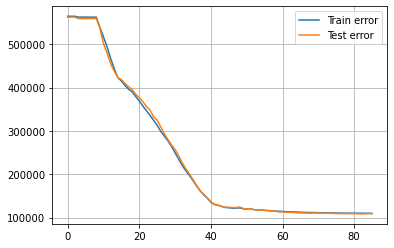

In [46]:
train1_error_cox=[]
test1_error_cox=[]
for i in range (1,x_train_sc_cox.shape[1]+1):
    lr_cox=LinearRegression()
    rfe_cox=RFE(lr_cox,n_features_to_select=i)
    rfe_cox=rfe_cox.fit(x_train_sc_cox,y_train_cox)
    lr_cox.fit(x_train_sc_cox.loc[:,rfe_cox.support_],y_train_cox)
    y_pred_train_cox=lr_cox.predict(x_train_sc_cox.loc[:,rfe_cox.support_])
    y_pred_test_cox=lr_cox.predict(x_test_sc_cox.loc[:,rfe_cox.support_])
    train1_error_cox.append(np.sqrt(mean_squared_error(y_train_cox,y_pred_train_cox)))
    test1_error_cox.append(np.sqrt(mean_squared_error(y_test_cox,y_pred_test_cox)))
plt.plot(train1_error_cox,label='Train error')
plt.plot(test1_error_cox,label='Test error')
plt.legend()
plt.grid()

In [47]:
error1_cox=pd.DataFrame()
error1_cox['index']=range(1,x_train_sc_cox.shape[1]+1)
error1_cox['train_error']=train1_error_cox
error1_cox['test_error']=test1_error_cox
error1_cox[69:80]

,index,train_error,test_error
69,70,111771.753554,111156.936303
70,71,111390.551984,110623.036023
71,72,111203.665411,110260.888562
72,73,111024.956029,110258.845983
73,74,110914.902597,110224.812206
74,75,110854.986231,109993.024057
75,76,110586.466258,109444.250773
76,77,110450.950829,109319.920850
77,78,110327.536477,109266.759652
78,79,110258.885239,109202.100318


In [48]:
rfe_cox=RFE(LinearRegression(),n_features_to_select=76)
rfe_cox=rfe_cox.fit(x_train_sc_cox,y_train_cox)
lr_cox=LinearRegression()
#lr_cox.fit(x_train_sc_cox.loc[:,rfe_cox.support_])
x_train_cox=x_train_sc_cox.loc[:,rfe_cox.support_]
x_test_cox=x_test_sc_cox.loc[:,rfe_cox.support_]

In [49]:
x_train_cox,x_test_cox,y_train_cox,y_test_cox

(       Store_1  Store_2   Store_3   Store_4   Store_5   Store_6   Store_7  \
 0    -0.150486 -0.14913 -0.152499 -0.143592 -0.156453 -0.155145 -0.147076   
 1    -0.150486 -0.14913 -0.152499 -0.143592 -0.156453 -0.155145 -0.147076   
 2    -0.150486 -0.14913 -0.152499 -0.143592 -0.156453 -0.155145 -0.147076   
 3    -0.150486 -0.14913 -0.152499 -0.143592 -0.156453 -0.155145 -0.147076   
 4    -0.150486 -0.14913 -0.152499 -0.143592 -0.156453 -0.155145 -0.147076   
 ...        ...      ...       ...       ...       ...       ...       ...   
 5143 -0.150486 -0.14913 -0.152499 -0.143592 -0.156453 -0.155145 -0.147076   
 5144 -0.150486 -0.14913 -0.152499 -0.143592 -0.156453 -0.155145 -0.147076   
 5145 -0.150486 -0.14913 -0.152499 -0.143592 -0.156453 -0.155145 -0.147076   
 5146 -0.150486 -0.14913 -0.152499 -0.143592 -0.156453 -0.155145 -0.147076   
 5147 -0.150486 -0.14913 -0.152499 -0.143592 -0.156453 -0.155145 -0.147076   
 
       Store_8   Store_9  Store_10  ...   Week_47   Week_48   

In [69]:
x_train.to_csv('x_train_out.csv')
x_test.to_csv('x_test_out.csv')
y_train.to_csv('y_train_out.csv')
y_test.to_csv('y_test_out.csv')

In [70]:
x_train_cox.to_csv('x_train_cox.csv')
x_test_cox.to_csv('x_test_cox.csv')
y_train_cox.to_csv('y_train_cox.csv')
y_test_cox.to_csv('y_test_cox.csv')

In [52]:
x_train_mod=sm.add_constant(x_train)
reg_ols=sm.OLS(y_train,x_train_mod).fit()
reg_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     1827.
Date:                Mon, 28 Nov 2022   Prob (F-statistic):               0.00
Time:                        13:03:38   Log-Likelihood:                -62002.
No. Observations:                4760   AIC:                         1.241e+05
Df Residuals:                    4692   BIC:                         1.246e+05
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.048e+06   1603.470    653.678      0.000    1.05e+06    1.05e+06
Store_1         3.575e+04   2013.873     17.752      0.000    3.18e+04    3.97e+04
Store_2         9.269e+04   2030.489     45.650      0.000    8.87e+04    9.67e+04
Store_3        -1.489e+05   2097.810    -70.994      0.000   -1.53e+05   -1.45e+05
Store_4         1.595e+05   1981.804     80.504      0.000    1.56e+05    1.63e+05
Store_5        -1.619e+05   2187.161    -74.011      0.000   -1.66e+05   -1.58e+05
Store_6         3.155e+04   2170.954     14.535      0.000    2.73e+04    3.58e+04
Store_7        -8.624e+04   1968.050    -43.822      0.000   -9.01e+04   -8.24e+04
Store_8         -7.47e+04   2299.024    -32.493      0.000   -7.92e+04   -7.02e+04
Store_9        -1.331e+05   2306.948    -57.691      0.000   -1.38e+05   -1.29e+05
Store_10         1.57e+05   2466.688     63.662      0.000    1.52e+05    1.62e+05
Store_12        1.217e+04   1965.894      6.191      0.000    8315.998     1.6e+04
Store_13        1.763e+05   2113.118     83.425      0.000    1.72e+05     1.8e+05
Store_14        1.366e+05   1955.594     69.844      0.000    1.33e+05     1.4e+05
Store_15       -3.972e+04   2191.856    -18.124      0.000    -4.4e+04   -3.54e+04
Store_16       -1.094e+05   1962.237    -55.766      0.000   -1.13e+05   -1.06e+05
Store_18        3.482e+04   2421.208     14.380      0.000    3.01e+04    3.96e+04
Store_19        8.916e+04   2240.781     39.788      0.000    8.48e+04    9.35e+04
Store_20         1.23e+05   1982.782     62.052      0.000    1.19e+05    1.27e+05
Store_21       -8.588e+04   2000.428    -42.931      0.000   -8.98e+04    -8.2e+04
Store_22        1.949e+04   2132.178      9.139      0.000    1.53e+04    2.37e+04
Store_23        5.241e+04   1931.184     27.141      0.000    4.86e+04    5.62e+04
Store_24        7.292e+04   2290.646     31.836      0.000    6.84e+04    7.74e+04
Store_25       -8.896e+04   2009.839    -44.260      0.000   -9.29e+04    -8.5e+04
Store_26        2.039e+04   2149.736      9.483      0.000    1.62e+04    2.46e+04
Store_27         1.33e+05   2162.368     61.508      0.000    1.29e+05    1.37e+05
Store_28        2.804e+04   1979.508     14.167      0.000    2.42e+04    3.19e+04
Store_29       -4.259e+04   2709.301    -15.721      0.000   -4.79e+04   -3.73e+04
Store_30       -1.338e+05   2007.453    -66.652      0.000   -1.38e+05    -1.3e+05
Store_31        1.078e+04   1998.354      5.394      0.000    6862.074    1.47e+04
Store_33       -9.148e+04   2532.803    -36.117      0.000   -9.64e+04   -8.65e+04
Store_34        2.839e+04   2894.761      9.806      0.000    2.27e+04    3.41e+04
Store_35        7248.4523   2325.841      3.116      0.002    2688.711    1.18e+04
Store_36       -1.511e+05   2037.459    -74.151      0.000   -1.55e+05   -1.47e+05
Store_37    

In [53]:
x_train_mod=sm.add_constant(x_train_cox)
reg_ols_cox=sm.OLS(y_train_cox,x_train_mod).fit()
reg_ols_cox.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     1744.
Date:                Mon, 28 Nov 2022   Prob (F-statistic):               0.00
Time:                        13:03:38   Log-Likelihood:                -67091.
No. Observations:                5148   AIC:                         1.343e+05
Df Residuals:                    5074   BIC:                         1.348e+05
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.046e+06   1552.341    673.684      0.000    1.04e+06    1.05e+06
Store_1         3.394e+04   1856.281     18.285      0.000    3.03e+04    3.76e+04
Store_2         8.717e+04   1849.599     47.128      0.000    8.35e+04    9.08e+04
Store_3        -1.433e+05   1906.565    -75.144      0.000   -1.47e+05    -1.4e+05
Store_4         1.602e+05   2186.956     73.237      0.000    1.56e+05    1.64e+05
Store_5        -1.651e+05   2033.086    -81.217      0.000   -1.69e+05   -1.61e+05
Store_6          2.67e+04   1968.972     13.562      0.000    2.28e+04    3.06e+04
Store_7        -8.492e+04   1846.399    -45.993      0.000   -8.85e+04   -8.13e+04
Store_8        -7.491e+04   2077.816    -36.050      0.000    -7.9e+04   -7.08e+04
Store_9        -1.307e+05   2087.006    -62.627      0.000   -1.35e+05   -1.27e+05
Store_10        1.602e+05   2468.536     64.910      0.000    1.55e+05    1.65e+05
Store_12        4.724e+04   3425.130     13.793      0.000    4.05e+04     5.4e+04
Store_13        1.668e+05   2159.737     77.254      0.000    1.63e+05    1.71e+05
Store_14        1.304e+05   1844.262     70.720      0.000    1.27e+05    1.34e+05
Store_15       -3.816e+04   2174.684    -17.548      0.000   -4.24e+04   -3.39e+04
Store_16        -1.09e+05   1840.003    -59.253      0.000   -1.13e+05   -1.05e+05
Store_18        3.524e+04   2309.399     15.261      0.000    3.07e+04    3.98e+04
Store_19        7.963e+04   2142.811     37.159      0.000    7.54e+04    8.38e+04
Store_20        1.192e+05   1843.608     64.658      0.000    1.16e+05    1.23e+05
Store_21       -8.713e+04   1876.143    -46.439      0.000   -9.08e+04   -8.34e+04
Store_22        1.758e+04   2094.425      8.394      0.000    1.35e+04    2.17e+04
Store_23        4.692e+04   2468.973     19.004      0.000    4.21e+04    5.18e+04
Store_24        7.371e+04   2264.564     32.551      0.000    6.93e+04    7.82e+04
Store_25       -8.698e+04   1840.637    -47.253      0.000   -9.06e+04   -8.34e+04
Store_26        1.864e+04   2127.953      8.761      0.000    1.45e+04    2.28e+04
Store_27        1.301e+05   2143.970     60.663      0.000    1.26e+05    1.34e+05
Store_28        9.415e+04   3480.924     27.049      0.000    8.73e+04    1.01e+05
Store_29       -4.017e+04   2519.086    -15.947      0.000   -4.51e+04   -3.52e+04
Store_30       -1.306e+05   1858.665    -70.266      0.000   -1.34e+05   -1.27e+05
Store_31        1.016e+04   1852.461      5.486      0.000    6531.039    1.38e+04
Store_33       -8.451e+04   2460.751    -34.345      0.000   -8.93e+04   -7.97e+04
Store_34        2.969e+04   2631.327     11.283      0.000    2.45e+04    3.48e+04
Store_35        7708.6130   2203.156      3.499      0.000    3389.477     1.2e+04
Store_36       -1.406e+05   1870.967    -75.132      0.000   -1.44e+05   -1.37e+05
Store_37    